![zad1.png](images/note2/zad1.png)

In [8]:
# Zadanie w pdfie (images/note2/solutions)

zdjecie

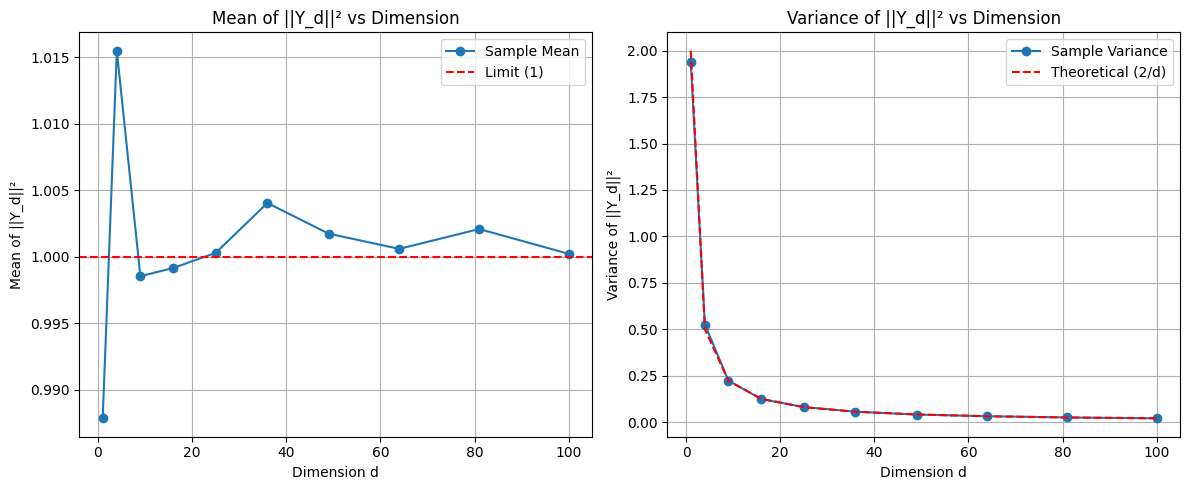

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sample size
N = 10000

dimensions = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

means = []
variances = []

for d in dimensions:
    # Generate N samples of d-dimensional Gaussian vectors
    X = np.random.normal(0, 1, size=(N, d))
    
    # Normalize
    Y = X / np.sqrt(d)
    
    norm_squared = np.sum(Y**2, axis=1)
    
    mean_norm = np.mean(norm_squared)
    var_norm = np.var(norm_squared)
    
    means.append(mean_norm)
    variances.append(var_norm)

plt.figure(figsize=(12, 5))

# means
plt.subplot(1, 2, 1)
plt.plot(dimensions, means, 'o-', label='Sample Mean')
plt.axhline(y=1, color='r', linestyle='--', label='Limit (1)')
plt.xlabel('Dimension d')
plt.ylabel('Mean of ||Y_d||²')
plt.title('Mean of ||Y_d||² vs Dimension')
plt.grid(True)
plt.legend()

# variances
plt.subplot(1, 2, 2)
plt.plot(dimensions, variances, 'o-', label='Sample Variance')
plt.plot(dimensions, [2/d for d in dimensions], 'r--', label='Theoretical (2/d)')
plt.xlabel('Dimension d')
plt.ylabel('Variance of ||Y_d||²')
plt.title('Variance of ||Y_d||² vs Dimension')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

![zad3_1.png](images/note2/zad3_1.png)
![zad3_2.png](images/note2/zad3_2.png)

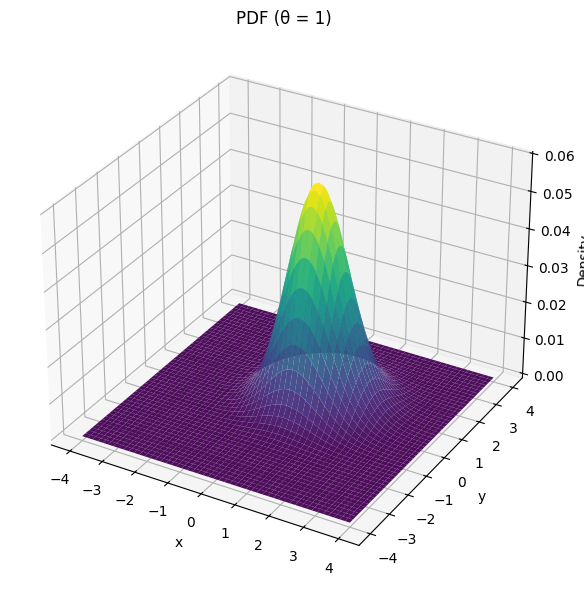

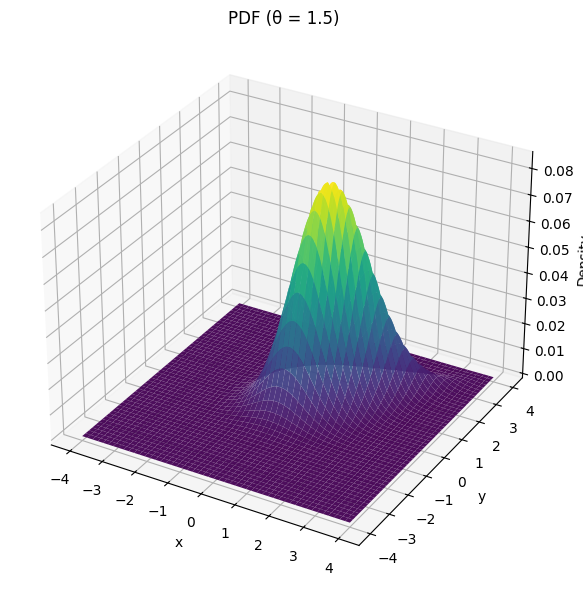

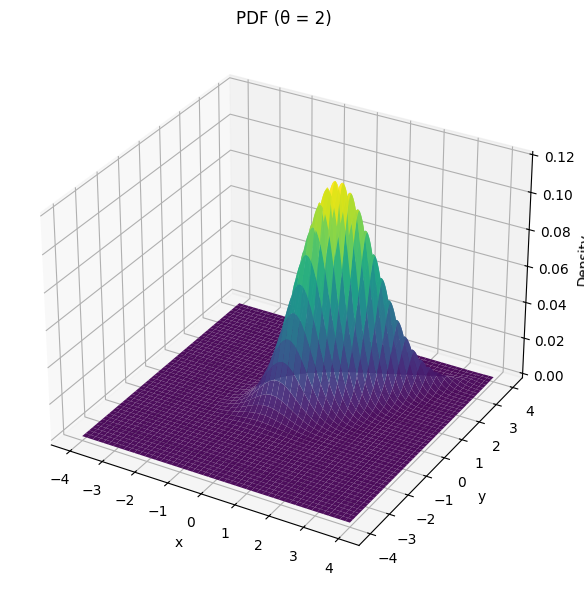

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

def gumble_copula_pdf(u, v, t):
    rev_u = -np.log(u)
    rev_v= -np.log(v)
    val = (rev_u**t + rev_v**t)**(1/t)
    cdf_gumbel = np.exp(-(val))
    exp_content = -((-np.log(u))**t + (-np.log(v))**t)**((1/t))

    return np.exp(exp_content)*(-np.log(u))**(-1+t) * (-1+t+val) * (((-np.log(u))**t + (-np.log(v))**t)**(-2 + 1/t)) * (-np.log(v))**(-1 + t)

x = np.linspace(-4, 4, 300)
y = np.linspace(-4, 4, 300)
X, Y = np.meshgrid(x, y)

u = norm.cdf(X)
v = norm.cdf(Y)
pdf_X = norm.pdf(X)
pdf_Y = norm.pdf(Y)
thetas = [1, 1.5, 2]

for theta in thetas:
    gcp = gumble_copula_pdf(u, v, theta)
    joint_pdf = gcp * pdf_X * pdf_Y

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, joint_pdf, cmap='viridis', edgecolor='none', alpha=0.95)
    ax.set_title(f'PDF (θ = {theta})')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Density')
    plt.tight_layout()
    plt.show()

![zad4.png](images/note2/zad4.png)

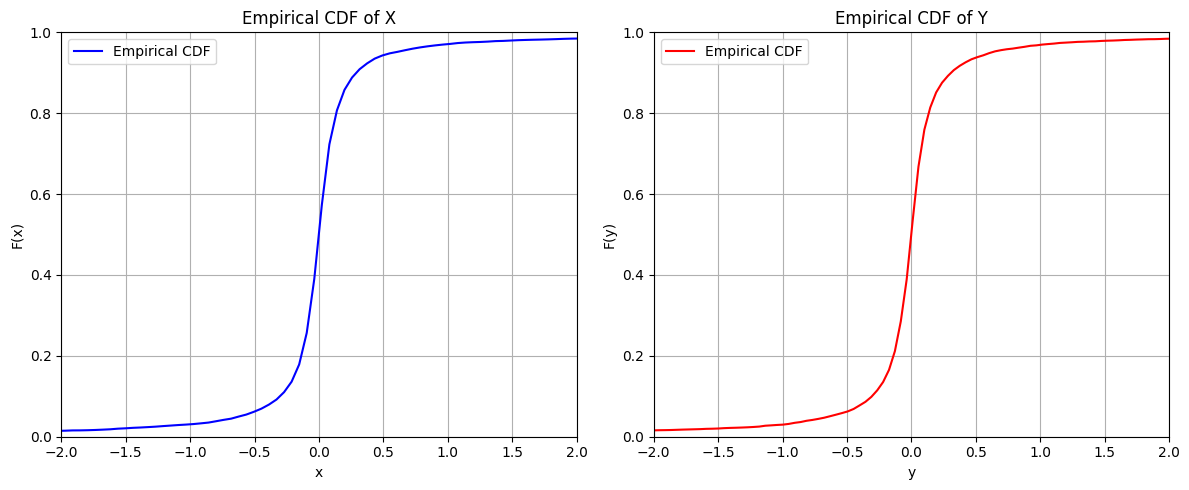

Estimated correlation coefficient ρ: -0.5924


In [10]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

data = np.loadtxt('data/data2.txt')
x = data[:, 0] # z podpowiedzi xi, tutaj i = 1
y = data[:, 1] # i = 2

# podpunkt A
def empirical_cdf(data):
    # obliczanie empirycznej dystrybuanty:
    # 1. sortujemy dane
    sorted_data = np.sort(data)
    # 2. tworzymy punkty rownomiernie rozlozone do ewaluacji
    eval_points = np.linspace(min(sorted_data), max(sorted_data), len(sorted_data))
    # 3. obliczamy wartości dystrybuanty dla każdego punktu
    cdf_values = np.array([np.mean(sorted_data <= point) for point in eval_points])
    return eval_points, cdf_values

x_points, x_cdf = empirical_cdf(x)
y_points, y_cdf = empirical_cdf(y)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_points, x_cdf, 'b-', label='Empirical CDF')
plt.xlim(-2, 2) # ograniczenie zakresu wyswietlania [-2, 2]
plt.ylim(0, 1)
plt.grid(True)
plt.title('Empirical CDF of X')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_points, y_cdf, 'r-', label='Empirical CDF')
plt.xlim(-2, 2)
plt.ylim(0, 1)
plt.grid(True)
plt.title('Empirical CDF of Y')
plt.xlabel('y')
plt.ylabel('F(y)')
plt.legend()

plt.tight_layout()
plt.show()

# podpunkt B
def to_uniform(data):
    # konwersja do rozkładu jednostajnego przy użyciu rang gdzie
    # dodajemy 1 do naszego licznika i mianownika aby uniknąć wartości 0 i 1
    ranks = np.argsort(np.argsort(data))
    return (ranks + 1) / (len(data) + 1)

u1 = to_uniform(x)
u2 = to_uniform(y)

# transformujemy teraz z rozkładu jednostajnego do rozkladu standardowego /
# / normalnego, używamy clip aby uniknąć wartości skrajnych powodujących
# problemy numeryczne przez które dostawalismy wynik NaN
z1 = norm.ppf(np.clip(u1, 0.001, 0.999))
z2 = norm.ppf(np.clip(u2, 0.001, 0.999))

# obliczamy współczynnik korelacji gotową funkcją
rho = np.corrcoef(z1, z2)[0, 1]
print(f'Estimated correlation coefficient ρ: {rho:.4f}')